In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
file_path = r'C:\Users\User\BA Projects\Sentiment-Analysis-Amazon\Data\train.ft.txt\train.ft.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = []
for line in lines:
    parts = line.strip().split(' ',1)
    if len(parts) == 2:
        label, text = parts
        data.append((label, text))

df = pd.DataFrame(data, columns=['label', 'text'])

df['Sentiment'] = df['label'].apply(lambda x: int(x.replace('__label__','')))
df['Sentiment'] = df['Sentiment'].map({1: 'Negative', 2: 'Positive'})

df.head()

,label,text,Sentiment
0,__label__2,Stuning even for the non-gamer: This sound tra...,Positive
1,__label__2,The best soundtrack ever to anything.: I'm rea...,Positive
2,__label__2,Amazing!: This soundtrack is my favorite music...,Positive
3,__label__2,Excellent Soundtrack: I truly like this soundt...,Positive
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He...",Positive


In [3]:
print("Shape", df.shape)
print("nData Tyes:\n", df.dtypes)

Shape (3600000, 3)
nData Tyes:
 label        object
text         object
Sentiment    object
dtype: object


In [4]:
print("\nClass Distribution:\n", df['Sentiment'].value_counts())


Class Distribution:
 Sentiment
Positive    1800000
Negative    1800000
Name: count, dtype: int64


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 label        0
text         0
Sentiment    0
dtype: int64


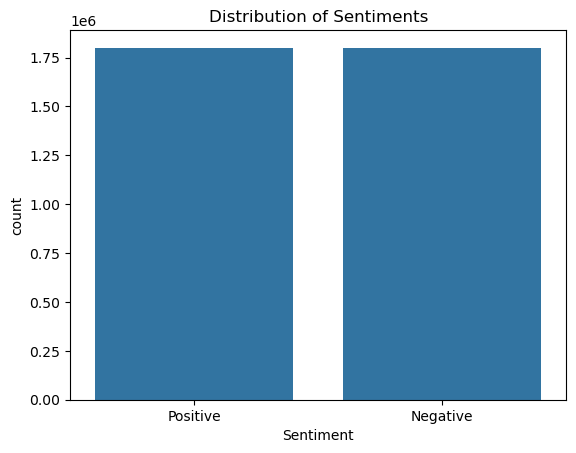

In [6]:
sns.countplot(data=df, x='Sentiment')
plt.title("Distribution of Sentiments")
plt.show()

In [7]:
df_sample = df.sample(n=50000,  random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['Sentiment'], test_size=0.2, random_state=42, stratify=df['Sentiment'])
vectorizer = TfidfVectorizer(
    max_features=3000,
    stop_words='english',
    ngram_range=(1,1))

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("Accuracy", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy 0.8814972222222223

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.88      0.88    360000
    Positive       0.88      0.89      0.88    360000

    accuracy                           0.88    720000
   macro avg       0.88      0.88      0.88    720000
weighted avg       0.88      0.88      0.88    720000


Confusion Matrix:
 [[315814  44186]
 [ 41136 318864]]


In [15]:
def predict_sentiment(text):
    text_tfidf = vectorizer.transform([text])
    pred = model.predict(text_tfidf)[0]
    return pred

In [19]:
print(predict_sentiment("This product is absoluey mazing, I love it!"))
print(predict_sentiment("Meh, it's ok I guess."))
print(predict_sentiment("I can't even be mad. It sucked that bad."))

Positive
Negative
Negative
